In [2]:
from msmbuilder.example_datasets import FsPeptide, MetEnkephalin
from msmbuilder.featurizer import DihedralFeaturizer

fs = FsPeptide().get().trajectories
n_atoms = fs[0].n_atoms
dih_model = DihedralFeaturizer(['phi', 'psi', 'omega', 'chi1', 'chi2', 'chi3', 'chi4'])
fs_dih_feat = dih_model.transform(fs)

loading trajectory_1.xtc...
loading trajectory_10.xtc...
loading trajectory_11.xtc...
loading trajectory_12.xtc...
loading trajectory_13.xtc...
loading trajectory_14.xtc...
loading trajectory_15.xtc...
loading trajectory_16.xtc...
loading trajectory_17.xtc...
loading trajectory_18.xtc...
loading trajectory_19.xtc...
loading trajectory_2.xtc...
loading trajectory_20.xtc...
loading trajectory_21.xtc...
loading trajectory_22.xtc...
loading trajectory_23.xtc...
loading trajectory_24.xtc...
loading trajectory_25.xtc...
loading trajectory_26.xtc...
loading trajectory_27.xtc...
loading trajectory_28.xtc...
loading trajectory_3.xtc...
loading trajectory_4.xtc...
loading trajectory_5.xtc...
loading trajectory_6.xtc...
loading trajectory_7.xtc...
loading trajectory_8.xtc...
loading trajectory_9.xtc...


In [3]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pyemma
tica = pyemma.coordinates.tica(fs_dih_feat,lag=100,dim=10)

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/pyEMMA-2.0.1-py2.7-macosx-10.5-x86_64.egg/pyemma/coordinates/util/stat.py:31: DeprecationWarning: Call to deprecated function hist. Called from pyemma.coordinates.util.stat line 31. Please use pyemma.coordinates.histogram()
  def hist(transform, dimensions, nbins):


In [5]:
np.max(tica.feature_TIC_correlation[:,0]),np.argmax(tica.feature_TIC_correlation[:,0])

(0.61325799955361537, 78)

In [6]:
Y = np.vstack(tica.transform(fs_dih_feat))
Y.shape

(280000, 10)

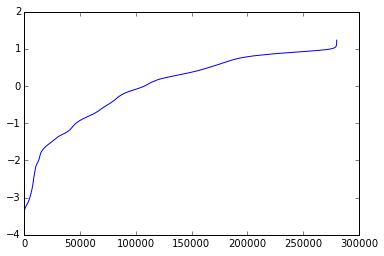

In [7]:
plt.plot(sorted(Y[:,0]))

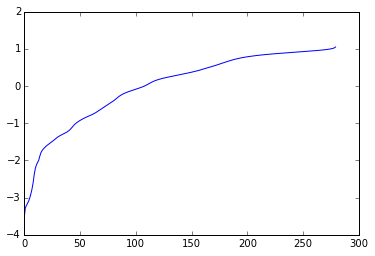

In [8]:
plt.plot(sorted(Y[:,0])[::1000])

In [9]:
ind = sorted(range(len(Y)),key=lambda i:Y[i,0])
ind

[157540,
 157502,
 157536,
 158360,
 158543,
 157457,
 158173,
 157316,
 157524,
 158394,
 158765,
 158137,
 157612,
 157302,
 157317,
 157517,
 157564,
 157304,
 157534,
 157560,
 155710,
 158769,
 157541,
 157504,
 158771,
 158643,
 156993,
 157561,
 157503,
 158095,
 155125,
 155625,
 156553,
 157333,
 157512,
 158859,
 157952,
 159107,
 157781,
 156175,
 157425,
 157520,
 157602,
 154627,
 154383,
 157671,
 157554,
 155497,
 157840,
 158705,
 157588,
 159205,
 155718,
 158852,
 155917,
 157547,
 157272,
 158376,
 156820,
 158842,
 158414,
 158554,
 158099,
 157340,
 158770,
 158838,
 157545,
 154575,
 158435,
 158451,
 158755,
 156190,
 157495,
 155728,
 158014,
 158311,
 158082,
 158023,
 158191,
 155548,
 157368,
 158610,
 157485,
 157413,
 154823,
 157578,
 157066,
 155837,
 154804,
 157456,
 158279,
 158092,
 157022,
 157354,
 157682,
 157519,
 158848,
 155600,
 157666,
 158396,
 158428,
 158696,
 158460,
 157390,
 157597,
 155534,
 158639,
 157525,
 158031,
 155754,
 155953,
 

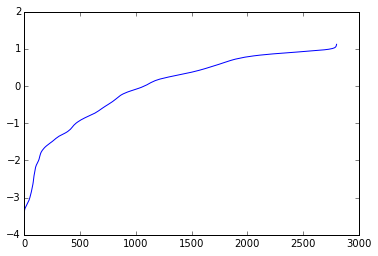

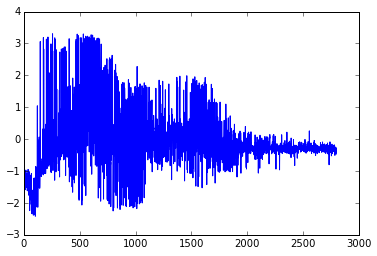

In [10]:
plt.plot(Y[ind,0][::100])
plt.figure()
plt.plot(Y[ind,1][::100])

In [11]:
ind[::1000]

[157540,
 154364,
 156590,
 154678,
 155871,
 153294,
 154028,
 152386,
 152076,
 151661,
 248289,
 246364,
 232429,
 247555,
 245072,
 242212,
 241105,
 230138,
 246109,
 87748,
 244887,
 89002,
 255378,
 87703,
 253496,
 243041,
 250527,
 88514,
 101841,
 78994,
 253681,
 255532,
 88938,
 257307,
 84298,
 84420,
 256866,
 256386,
 256183,
 129811,
 101313,
 236907,
 231648,
 231337,
 235378,
 46134,
 8796,
 73747,
 258368,
 238201,
 9516,
 258406,
 40689,
 232197,
 212113,
 45851,
 75189,
 257980,
 232068,
 234626,
 238204,
 232212,
 73460,
 3504,
 213044,
 3939,
 259014,
 4613,
 213025,
 4180,
 3205,
 100308,
 110366,
 48872,
 6020,
 3552,
 47489,
 6439,
 6914,
 6955,
 110297,
 30120,
 90800,
 208686,
 210393,
 210395,
 45042,
 46338,
 202628,
 180127,
 192268,
 109766,
 180203,
 203539,
 202178,
 203414,
 208630,
 110763,
 204735,
 31180,
 206184,
 693,
 110545,
 229215,
 2803,
 205044,
 108002,
 43504,
 191983,
 211483,
 204795,
 183424,
 126025,
 265425,
 92788,
 199550,
 92807,


In [12]:
import mdtraj

In [13]:
traj = fs[0]

In [14]:
for f in fs[1:]:
    traj = traj+f

In [15]:
frames = traj[ind[::1000]]
frames = frames.superpose(frames,0)

In [16]:
frames.save_pdb('fs_tic1_movie.pdb')